# **SUMMARY**

In [32]:
#Jupyter notebook 
import pymupdf


In [33]:
doc =pymupdf.open("gilbert-et-al-2003-multiple-scattering-calculations-of-bonding-and-x-ray-absorption-spectroscopy-of-manganese-oxides.pdf")

In [34]:
for page_index in range(len(doc)): # iterate over pdf pages
    page = doc[page_index] # get the page
    image_list = page.get_images()
    # print the number of images found on the page
    if image_list:
        print(f"Found {len(image_list)} images on page {page_index}")
    else:
        print("No images found on page", page_index)
    for image_index, img in enumerate(image_list, start=1): # enumerate the image list
        xref = img[0] # get the XREF of the image
        pix = pymupdf.Pixmap(doc, xref) # create a Pixmap
        if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
            pix = pymupdf.Pixmap(pymupdf.csRGB, pix)
        pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the image as png
        pix = None


No images found on page 0
No images found on page 1
Found 3 images on page 2
Found 2 images on page 3
No images found on page 4
Found 1 images on page 5
Found 2 images on page 6
No images found on page 7
No images found on page 8


In [35]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

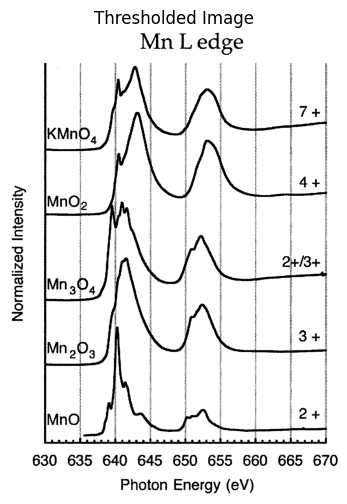

In [36]:
# Load image
img = cv2.imread("page_2-image_1.png", cv2.IMREAD_GRAYSCALE)
# Thresholding to binary image
_, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
# Step: Thresholded Image
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

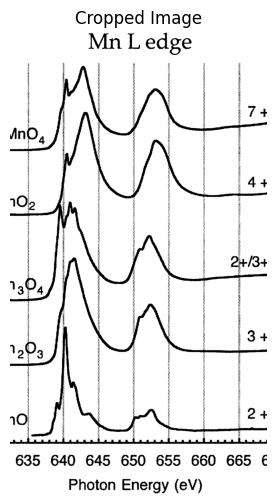

In [42]:
#step 1: crop the image to focus on the graph area
#Assuming the graph occupies most of the image, we mainly crop out the borders
#Adjust these value according to your image's borrders
cropped_img = thresh[:,200:-75] #Adjust crop dimensions as needed

#ste: Thresholded Image
plt.figure(figsize=(6,6))
plt.imshow(cropped_img, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')
plt.show()

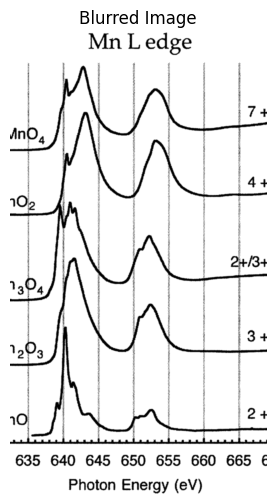

In [47]:
#Apply Gaussian Blur (optional may help smooth lines)
blurred_img=cv2.GaussianBlur(cropped_img, (5, 5), 0)


#Step: Blurred + Threshold image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


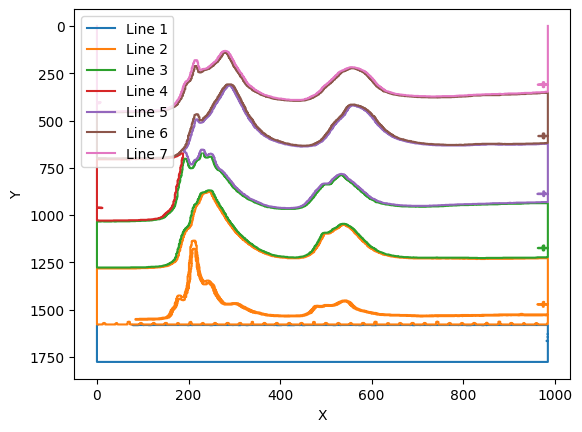

Contours found: 7


{'line_1':        x     y
 0      1  1581
 1      0  1582
 2      0  1776
 3    985  1776
 4    985  1666
 ..   ...   ...
 107  101  1581
 108   91  1581
 109   90  1582
 110   79  1582
 111   78  1581
 
 [112 rows x 2 columns],
 'line_2':         x    y
 0     243  878
 1     243  879
 2     239  883
 3     237  883
 4     236  884
 ...   ...  ...
 1883  250  888
 1884  250  886
 1885  249  885
 1886  249  880
 1887  247  878
 
 [1888 rows x 2 columns],
 'line_3':         x    y
 0     228  674
 1     228  675
 2     227  676
 3     227  686
 4     226  687
 ...   ...  ...
 1223  235  687
 1224  234  686
 1225  234  677
 1226  233  676
 1227  233  674
 
 [1228 rows x 2 columns],
 'line_4':        x    y
 0    184  674
 1    182  676
 2    182  679
 3    180  681
 4    180  682
 ..   ...  ...
 147  186  700
 148  187  699
 149  187  696
 150  188  695
 151  188  674
 
 [152 rows x 2 columns],
 'line_5':         x    y
 0     287  316
 1     286  317
 2     286  320
 3     284  322
 4  

In [52]:
 # Find contours of the lines
contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create lists to store the x and y coordinates of each line
lines_data = {}

# Loop through contours to extract data points for each line
for i, contour in enumerate(contours):
    # Get the contour's points and flatten to a 2D array
    contour_points = contour.squeeze()
    # Separate x and y coordinates
    x_coords = contour_points[:, 0]
    y_coords = contour_points[:, 1]
    # Store the line's data points
    lines_data[f'line_{i+1}'] = {'x': x_coords, 'y': y_coords}
# Optionally, plot each line
    plt.plot(x_coords, y_coords, label=f'Line {i+1}')
# Show the lines on a plot
plt.gca().invert_yaxis() # Invert y-axis to match image coordinate system
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# Convert the extracted data to pandas DataFrames
dataframes = {}
for line_name, data in lines_data.items():
    dataframes[line_name] = pd.DataFrame({'x': data['x'], 'y': data['y']})
print("Contours found: "+str(len(contours)))
dataframes


